<a href="https://colab.research.google.com/github/DristantaNirola/Airline_Passenger_referral_Prediction/blob/main/Airline_Passenger_referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

Feature descriptions briefly as follows:
airline: Name of the airline.  
overall: Overall point is given to the trip between 1 to 10.  
author: Author of the trip  
reviewdate: Date of the Review customer review: Review of the customers in free text format  
aircraft: Type of the aircraft  
travellertype: Type of traveler (e.g. business, leisure)  
cabin: Cabin at the flight date flown: Flight date  
seatcomfort: Rated between 1-5  
cabin service: Rated between 1-5  
foodbev: Rated between 1-5 entertainment: Rated between 1-5  
groundservice: Rated between 1-5  
valueformoney: Rated between 1-5  
recommended: Binary, target variable.  

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Loading the Dataset

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the xlsx file from the drive
data= pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 5/Week 2/Day 1/data_airline_reviews.xlsx')

In [4]:
# Shape of the data
data.shape

(131895, 17)

In [5]:
# First 10 row 
data.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


## Conclusion:   
1) Shape of the dataset is (131895, 17)  
2) Every alternative row in the dataset has all NaN values.

#3. Data Cleaning and Imputations:

## 3.1. Removing the rows with all NaN values.

In [6]:
# Removing the columns with all NaN values.
data.dropna(how='all', inplace=True)

In [7]:
# Shape of the dataset after alternative col removal
data.shape

(65947, 17)

##3.2. Removing duplicate values

In [8]:
df_airline= data.copy()

In [9]:
# Checking the duplicate values
df_airline[df_airline.duplicated(keep= False)]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2173,Turkish Airlines,8.0,Perrin Michel,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2183,Turkish Airlines,8.0,Perrin Michel,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2215,Turkish Airlines,1.0,P James,24th February 2015,BKK-IST-ARN on A330 and then A321. Flight from...,NaN,NaN,Business Class,NaN,NaN,5.0,3.0,4.0,4.0,NaN,1.0,no
2221,Turkish Airlines,1.0,P James,24th February 2015,BKK-IST-ARN on A330 and then A321. Flight from...,NaN,NaN,Business Class,NaN,NaN,5.0,3.0,4.0,4.0,NaN,1.0,no
2257,Turkish Airlines,1.0,C Cheong,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128530,Norwegian,9.0,S Hollenbeck,27th July 2014,My son and I flew no frills with carry-on Oakl...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,NaN,5.0,NaN,4.0,yes
128544,Norwegian,NaN,L Watson,13th July 2014,This is by the far the worst airline I have fl...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,3.0,1.0,NaN,1.0,no
128546,Norwegian,NaN,L Watson,13th July 2014,This is by the far the worst airline I have fl...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,3.0,1.0,NaN,1.0,no
128724,Norwegian,8.0,Lise Omdal,11th November 2013,OSL-BGO. Punctual - arrived a little earlier t...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,1.0,5.0,NaN,5.0,yes


In [10]:
# Keeping only the first values from the duplicate values
df_airline.drop_duplicates(keep= 'first',inplace=True)

In [11]:
df_airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [12]:
df_airline.shape

(61183, 17)

In [13]:
# No of duplicate values in the dataset
data.shape[0] - df_airline.shape[0] 

4764

In [14]:
# % of duplicate values 
4764*100/65947

7.223982895355361

Conclusion:

* There were 4764 duplicate values in the dataset.
* Percentage of duplicate values is 7.2%

In [15]:
# Checking the NaN values
df_airline.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

## 3.3. Imputation of the dependent variable:

#### 2.3.1. Using the overall rating provided by the user. 

In [16]:
sub_df= data[['overall','recommended']]

In [17]:
# Checking the # of datapoints that can be imputed
df_check= sub_df[sub_df['recommended'].isnull()]

In [18]:
df_check.shape

(1507, 2)

In [19]:
df_check[df_check['overall'].isnull()].shape

(20, 2)

* Out of 1507 we can impute 1487 recommended values using overall rating.

In [20]:
sub_df.dropna(inplace=True)
sub_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(62530, 2)

In [21]:
sub_df.recommended.value_counts()

no     31990
yes    30540
Name: recommended, dtype: int64

In [22]:
df_bar= sub_df.value_counts().reset_index()
df_bar.columns= ['overall','recommended','values']
df_bar.sort_values(by=['overall','recommended'],ignore_index=True)

,overall,recommended,values
0,1.0,no,16942
1,1.0,yes,53
2,2.0,no,5771
3,2.0,yes,73
4,3.0,no,3803
5,3.0,yes,131
6,4.0,no,2232
7,4.0,yes,309
8,5.0,no,2031
9,5.0,yes,1061


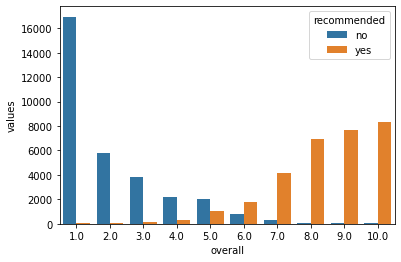

In [23]:
sns.barplot(y = 'values',
            x = 'overall',
            hue = 'recommended',
            data = df_bar)

## Conclusion:
* Their are still few datapoints in the dataframe which has low overall rating and has recomended the airline and vice varsa thus, the imputation based on the overall rating would not be valid.

### 2.3.2 Using the polarity of the review text

#### Drop the NaN values in dependent variable.

In [24]:
df_impute= df_airline.dropna(subset= ['recommended'])

In [25]:
df_impute.isna().sum()

airline                0
overall             1764
author                 0
review_date            0
customer_review        0
aircraft           41274
traveller_type     22222
cabin               1057
route              22249
date_flown         22327
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

## 3.4. Imputing the independent variable.

In [26]:
df_impute.isna().sum()

airline                0
overall             1764
author                 0
review_date            0
customer_review        0
aircraft           41274
traveller_type     22222
cabin               1057
route              22249
date_flown         22327
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

In [27]:
df_impute.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

# 3.4.1. Imputting the overall rating column using the scaled avg of the ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money'] columns 

In [28]:
# Scaling the columns to range 1-10 from 1-5
def scaled_feature(col):
  df_impute[col] = df_impute[col]*2

In [29]:
for col in ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']:
  scaled_feature(col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_impute.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,8.0,2.0,2.0,2.0,2.0,2.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,2.0,8.0,2.0,6.0,2.0,4.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,2.0,2.0,2.0,2.0,2.0,2.0,no


In [31]:
df_check= df_impute[df_impute['overall'].isnull()]

In [32]:
df_check.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2739,Turkish Airlines,NaN,Mark Evans,8th January 2014,London Heathrow to Odessa (Ukraine) return. Th...,NaN,NaN,Economy Class,NaN,NaN,8.0,2.0,2.0,6.0,NaN,6.0,no
2747,Turkish Airlines,NaN,Sabeen Obaidullah,8th January 2014,I took a business class flight from London to ...,NaN,NaN,Business Class,NaN,NaN,2.0,6.0,6.0,4.0,NaN,2.0,no
2757,Turkish Airlines,NaN,T Malik,4th January 2014,TK0710 and TK0711. The service from Istanbul t...,NaN,NaN,Economy Class,NaN,NaN,4.0,2.0,8.0,2.0,NaN,4.0,no
2761,Turkish Airlines,NaN,Prakash Neupane,3rd January 2014,Chicago - Kathmandu- Chicago. Poor to fair inf...,NaN,NaN,Economy Class,NaN,NaN,6.0,4.0,6.0,4.0,NaN,2.0,no
2827,Turkish Airlines,NaN,H Ikwue,6th December 2013,I was flying from Dublin to Lagos with stopove...,NaN,NaN,Economy Class,NaN,NaN,8.0,2.0,10.0,2.0,NaN,2.0,no


In [33]:
df_check.shape

(1764, 17)

In [34]:
df_check[df_check[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']].isnull()].shape

(1764, 17)

* All 1764 rows with nan values in overall rating column has NaN values in either of the other rating cloumns 

In [35]:
df_impute_temp = df_check.drop(columns = 'overall')
df_impute_temp['avg'] = round(df_impute_temp.mean(axis=1))

In [36]:
df_impute_temp['avg'].isna().sum()

125

In [37]:
df_impute_temp.fillna(value= df_impute_temp['value_for_money'],inplace = True)

In [38]:
df_impute['overall'].fillna(value= df_impute_temp['avg'],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [39]:
df_impute.isna().sum()

airline                0
overall              125
author                 0
review_date            0
customer_review        0
aircraft           41274
traveller_type     22222
cabin               1057
route              22249
date_flown         22327
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

### 3.4.2. Imputing ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money'] 

In [40]:
df_impute['seat_comfort'].fillna(value= df_impute['overall'],inplace = True)
df_impute['cabin_service'].fillna(value= df_impute['overall'],inplace = True)
df_impute['food_bev'].fillna(value= df_impute['overall'],inplace = True)
df_impute['entertainment'].fillna(value= df_impute['overall'],inplace = True)
df_impute['ground_service'].fillna(value= df_impute['overall'],inplace = True)
df_impute['value_for_money'].fillna(value= df_impute['overall'],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [41]:
df_impute.isna().sum()

airline                0
overall              125
author                 0
review_date            0
customer_review        0
aircraft           41274
traveller_type     22222
cabin               1057
route              22249
date_flown         22327
seat_comfort         125
cabin_service        125
food_bev             125
entertainment        125
ground_service       125
value_for_money      125
recommended            0
dtype: int64

### 3.5. Droping few of the columns that contains text values more then 50% and it is not possible to impute those value. Also, droping the NaN value row will cause data loss by more then 50%.

In [110]:
df_air = df_impute.drop(['aircraft','traveller_type','cabin','route','date_flown','review_date','author'],axis=1)

In [111]:
df_air.isna().sum()

airline            0  
overall            125
customer_review    0  
seat_comfort       125
cabin_service      125
food_bev           125
entertainment      125
ground_service     125
value_for_money    125
recommended        0  
dtype: int64

In [112]:
# Droping the 125 rows with nan values 
df_air.dropna(inplace=True)

In [113]:
# Shape of the dataset
df_air.shape

(59636, 10)

In [114]:
# % of data loss
(data.shape[0]- df_air.shape[0])*100/data.shape[0]

9.569806056378606

### Conclusion 
* After imputation and removing unwanted features the % of data loss is 9.57%

# 4. Feature engineering

## 4.1 Text featurization of the Review text column

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
import string
from nltk.corpus import stopwords

## Let us write a function which removes punctuation and stopwords from our data

In [115]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [116]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [117]:
df_air.head()

,airline,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,"âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,"âœ… Trip Verified | Istanbul to Bucharest. We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.",8.0,2.0,2.0,2.0,2.0,2.0,no
5,Turkish Airlines,3.0,"âœ… Trip Verified | Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: ""Relax Sir, No problem Sir, It's okay"". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it's an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two were old, seats worn. Food on board was of very poor quality.., let me repeat this, very...poor quality. In general i can say that crew is decently trained and deliver a good experience or at least they try, of course it is far from the experience you get flying Qatar or Emirates but still pretty good, while ground personnel, especially in Istanbul is the personification of the word Lazy. A complete disaster. I will try and avoid Turkish Airlines in the future, it is not a cheap company and definitely not worth for the money you pay. If you are in a hurry or you know you will be avoid this company and avoid the new istanbul airport at all costs.",2.0,8.0,2.0,6.0,2.0,4.0,no
7,Turkish Airlines,10.0,"âœ… Trip Verified | Flew on Turkish Airlines IAD-IST-KHI and return KHI-IST-IAD. Turkish Airlines has consistently maintained its quality since I first flew with them in 2007. The flights leave on time, the catering is excellent, the inflight entertainment is extensive and the interface easy to use, and the cabin crew is excellent. Interesting though the A330 on the KHI-IST route and return seemed to have more leg room and w

## Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [118]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [119]:
df_air['customer_review'] = df_air['customer_review'].apply(text_process)

In [120]:
df_air.head()

,airline,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,âœ… Trip Verified London Izmir via Istanbul First time Iâ€™d flown TK found good air cabin crew planes food nice great ground ground staff call centre computer systems flight LHR delayed missed connection Istanbul ground staff donâ€™t speak English given contradictory instructions could speak little English eventually got flight Izmir three hours later wasnâ€™t easy process made worse vast distances one walk gates cavernous new airport Also Iâ€™d phoned TK call centre based Ukraine pay extra Â£40 way extra leg room seats However departure times kept changing seats kept changing return leg London Istanbul given extra leg room seat Luckily spare exit row seat cabin crew sorted Overall think cabin crew planes good ground staff call centre staff need better training need better computer systems software work,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,âœ… Trip Verified Istanbul Bucharest make check airport Take luggage go gate gate surprise dont let uÈ™ board two children say flight overbooked wait airport two children 5 oclock morning bring uÈ™ hotel 2 hours far away airport without luggage without eat without nothing first last flight airline,8.0,2.0,2.0,2.0,2.0,2.0,no
5,Turkish Airlines,3.0,âœ… Trip Verified Rome Prishtina via Istanbul flew company several times past years honestly say getting worse worse flew Rome Prishtina via Istanbul 4 flights delay apparently pretty normal Turkish ground staff part useless Istambul tried ask information flight delay 30 minutes connecting flight whole answer Relax Sir problem Sir okay new airport gigantic mess big disorganized land Istanbul takes 20 25 minutes taxiing 10 minutes actually start disembarking exhausting experience especially hurry Forget asking indication new airport chat coffee hands flew four different aircraft trip two fairly new two old seats worn Food board poor quality let repeat verypoor quality general say crew decently trained deliver good experience least try course far experience get flying Qatar Emirates still pretty good ground personnel especially Istanbul personification word Lazy complete disaster try avoid Turkish Airlines future cheap company definitely worth money pay hurry know avoid company avoid new istanbul airport costs,2.0,8.0,2.0,6.0,2.0,4.0,no
7,Turkish Airlines,10.0,âœ… Trip Verified Flew Turkish Airlines IADISTKHI return KHIISTIAD Turkish Airlines consistently maintained quality since first flew 2007 flights leave time catering excellent inflight entertainment extensive interface easy use cabin crew excellent Interesting though A330 KHIIST route return seemed leg room newer A330 IADIST route showing age A330 IADIST route slow responding interface inflight entertainment broken table return flight Turkish Airlines replacing A330 flight IAD 787 sometime summer Turkish food served return leg personally like saw cabin staff helping elderly passengers walk lavatory nice Overall another wonderful experience Turkish Airlines,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,Turkish Airlines,1.0,âœ… Trip Verified Mumbai Dublin via Istanbul Never book Turkish airlines traveling Dublin Mumbai flight gets delay Mumbai dont options straight forward ask stay hotel Istanbul care time loss decisions made airlines crew within time kept waiting 3 hours,2.0,2.0,2.0,2.0,2.0,2.0,no


# Remove numeric values 

In [121]:
df_air['customer_review'] = df_air['customer_review'].str.replace('\d+', '')

In [122]:
df_air.head()

,airline,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,âœ… Trip Verified London Izmir via Istanbul First time Iâ€™d flown TK found good air cabin crew planes food nice great ground ground staff call centre computer systems flight LHR delayed missed connection Istanbul ground staff donâ€™t speak English given contradictory instructions could speak little English eventually got flight Izmir three hours later wasnâ€™t easy process made worse vast distances one walk gates cavernous new airport Also Iâ€™d phoned TK call centre based Ukraine pay extra Â£ way extra leg room seats However departure times kept changing seats kept changing return leg London Istanbul given extra leg room seat Luckily spare exit row seat cabin crew sorted Overall think cabin crew planes good ground staff call centre staff need better training need better computer systems software work,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,âœ… Trip Verified Istanbul Bucharest make check airport Take luggage go gate gate surprise dont let uÈ™ board two children say flight overbooked wait airport two children oclock morning bring uÈ™ hotel hours far away airport without luggage without eat without nothing first last flight airline,8.0,2.0,2.0,2.0,2.0,2.0,no
5,Turkish Airlines,3.0,âœ… Trip Verified Rome Prishtina via Istanbul flew company several times past years honestly say getting worse worse flew Rome Prishtina via Istanbul flights delay apparently pretty normal Turkish ground staff part useless Istambul tried ask information flight delay minutes connecting flight whole answer Relax Sir problem Sir okay new airport gigantic mess big disorganized land Istanbul takes minutes taxiing minutes actually start disembarking exhausting experience especially hurry Forget asking indication new airport chat coffee hands flew four different aircraft trip two fairly new two old seats worn Food board poor quality let repeat verypoor quality general say crew decently trained deliver good experience least try course far experience get flying Qatar Emirates still pretty good ground personnel especially Istanbul personification word Lazy complete disaster try avoid Turkish Airlines future cheap company definitely worth money pay hurry know avoid company avoid new istanbul airport costs,2.0,8.0,2.0,6.0,2.0,4.0,no
7,Turkish Airlines,10.0,âœ… Trip Verified Flew Turkish Airlines IADISTKHI return KHIISTIAD Turkish Airlines consistently maintained quality since first flew flights leave time catering excellent inflight entertainment extensive interface easy use cabin crew excellent Interesting though A KHIIST route return seemed leg room newer A IADIST route showing age A IADIST route slow responding interface inflight entertainment broken table return flight Turkish Airlines replacing A flight IAD sometime summer Turkish food served return leg personally like saw cabin staff helping elderly passengers walk lavatory nice Overall another wonderful experience Turkish Airlines,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,Turkish Airlines,1.0,âœ… Trip Verified Mumbai Dublin via Istanbul Never book Turkish airlines traveling Dublin Mumbai flight gets delay Mumbai dont options straight forward ask stay hotel Istanbul care time loss decisions made airlines crew within time kept waiting hours,2.0,2.0,2.0,2.0,2.0,2.0,no


# Lematisation

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [58]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [123]:
def text_process(msg):
  return " ".join([wnl.lemmatize(i) for i in msg.split()])

In [124]:
df_air['customer_review'] = df_air['customer_review'].apply(text_process)

In [97]:
df_air.columns

Index(['customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

## <b> Vectorization </b>

### 4.1.1 Beg of Word(BoW)

In [62]:
# importing the library
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
vectorizer = CountVectorizer(max_features=1000)

In [64]:
X = vectorizer.fit_transform(df_air['customer_review'])

In [65]:
Column= vectorizer.get_feature_names()

In [66]:
x= X.toarray()

In [67]:
x= pd.DataFrame(x,columns=Column)

In [68]:
# Splitting the data in to train and validate.
result = pd.concat([x, df_air], axis=1, join='inner')

In [69]:
result.drop(['customer_review'],axis=1,inplace=True)

In [70]:
result.head()

,aa,able,absolutely,abu,ac,acceptable,access,across,actually,add,additional,adequate,advance,advised,aer,age,agent,ago,ahead,air,airbus,aircraft,airline,airlines,airplane,airport,airways,aisle,alaska,alliance,allow,allowed,almost,along,already,also,alternative,although,always,am,...,wifi,window,wine,wish,within,without,woman,wonderful,wont,word,work,worked,working,world,worse,worst,worth,would,wouldnt,wow,wrong,year,yes,yet,york,young,youre,zurich,âœ,airline,overall,author,review_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,8.0,2.0,2.0,2.0,2.0,2.0,no
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Turkish Airlines,3.0,M Galerko,7th May 2019,2.0,8.0,2.0,6.0,2.0,4.0,no
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Turkish Airlines,1.0,Pooja Jain,6th May 2019,2.0,2.0,2.0,2.0,2.0,2.0,no


### TF-IDF

In [125]:
# importing the library
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
vectorizer = TfidfVectorizer(max_features=2000)

In [127]:
X = vectorizer.fit_transform(df_air['customer_review'])

In [130]:
Column= vectorizer.get_feature_names()

In [131]:
x= X.toarray()

In [132]:
x= pd.DataFrame(x,columns=Column)

In [133]:
# Splitting the data in to train and validate.
result = pd.concat([x, df_air], axis=1, join='inner')

In [134]:
result.drop(['customer_review'],axis=1,inplace=True)

In [135]:
result.head()

,aa,ababa,able,aboard,absolute,absolutely,abu,ac,accept,acceptable,accepted,access,accommodate,accommodating,accommodation,according,account,across,act,actual,actually,add,added,addis,addition,additional,address,adequate,adult,advance,advantage,advertised,advice,advise,advised,aegean,aer,aeroflot,aeromexico,af,...,working,world,worn,worried,worry,worse,worst,worth,would,wouldnt,wouldnâ,wow,write,writing,written,wrong,wrote,xx,year,yes,yesterday,yet,york,youll,young,youre,zealand,zero,zone,zurich,âœ,airline,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068176,Turkish Airlines,7.0,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042405,Turkish Airlines,2.0,8.0,2.0,2.0,2.0,2.0,2.0,no
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084894,Turkish Airlines,3.0,2.0,8.0,2.0,6.0,2.0,4.0,no
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072724,Turkish Airlines,10.0,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,0.0,0.0,0.061815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030299,Turkish Airlines,1.0,2.0,2.0,2.0,2.0,2.0,2.0,no


## Get text sentiment feature using VEDER 

In [161]:
sent_analysis = df_air.copy()

In [154]:
# Downloading packages
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [156]:
# Initiating
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [164]:
sent_analysis.head()

,airline,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,âœ… Trip Verified London Izmir via Istanbul First time Iâ€™d flown TK found good air cabin crew plane food nice great ground ground staff call centre computer system flight LHR delayed missed connection Istanbul ground staff donâ€™t speak English given contradictory instruction could speak little English eventually got flight Izmir three hour later wasnâ€™t easy process made worse vast distance one walk gate cavernous new airport Also Iâ€™d phoned TK call centre based Ukraine pay extra Â£ way extra leg room seat However departure time kept changing seat kept changing return leg London Istanbul given extra leg room seat Luckily spare exit row seat cabin crew sorted Overall think cabin crew plane good ground staff call centre staff need better training need better computer system software work,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,âœ… Trip Verified Istanbul Bucharest make check airport Take luggage go gate gate surprise dont let uÈ™ board two child say flight overbooked wait airport two child oclock morning bring uÈ™ hotel hour far away airport without luggage without eat without nothing first last flight airline,8.0,2.0,2.0,2.0,2.0,2.0,no
5,Turkish Airlines,3.0,âœ… Trip Verified Rome Prishtina via Istanbul flew company several time past year honestly say getting worse worse flew Rome Prishtina via Istanbul flight delay apparently pretty normal Turkish ground staff part useless Istambul tried ask information flight delay minute connecting flight whole answer Relax Sir problem Sir okay new airport gigantic mess big disorganized land Istanbul take minute taxiing minute actually start disembarking exhausting experience especially hurry Forget asking indication new airport chat coffee hand flew four different aircraft trip two fairly new two old seat worn Food board poor quality let repeat verypoor quality general say crew decently trained deliver good experience least try course far experience get flying Qatar Emirates still pretty good ground personnel especially Istanbul personification word Lazy complete disaster try avoid Turkish Airlines future cheap company definitely worth money pay hurry know avoid company avoid new istanbul airport cost,2.0,8.0,2.0,6.0,2.0,4.0,no
7,Turkish Airlines,10.0,âœ… Trip Verified Flew Turkish Airlines IADISTKHI return KHIISTIAD Turkish Airlines consistently maintained quality since first flew flight leave time catering excellent inflight entertainment extensive interface easy use cabin crew excellent Interesting though A KHIIST route return seemed leg room newer A IADIST route showing age A IADIST route slow responding interface inflight entertainment broken table return flight Turkish Airlines replacing A flight IAD sometime summer Turkish food served return leg personally like saw cabin staff helping elderly passenger walk lavatory nice Overall another wonderful experience Turkish Airlines,8.0,10.0,10.0,10.0,10.0,10.0,yes
9,Turkish Airlines,1.0,âœ… Trip Verified Mumbai Dublin via Istanbul Never book Turkish airline traveling Dublin Mumbai flight get delay Mumbai dont option straight forward ask stay hotel Istanbul care time loss decision made airline crew within time kept waiting hour,2.0,2.0,2.0,2.0,2.0,2.0,no


In [166]:
sent_analysis['customer_review'] = sent_analysis['customer_review'].str.split('.',n=1,expand=True)

In [169]:
sent_analysis.dropna(subset =['customer_review'],inplace = True)

In [172]:
# copy review text to review list
reviews_list = sent_analysis['customer_review'].copy()

In [173]:
# Augment the dataset with the overall polarity score of the review, as obtained using VADER on the review level.
reviews_polarity = []

for i_review, review in enumerate(reviews_list):
    review_polarity_scores = sid.polarity_scores(review)
    review_polarity_score_compound = review_polarity_scores['compound']
    
    '''Uncomment this to print the sentiment score of every review in the dataset.
    
    print('Review #{:d}: '.format(i_review), end='')
    for key in sorted(review_polarity_scores.keys()):
        print('{}: {:.4f}, '.format(key,review_polarity_scores[key]), end='')
    print('')  '''
    
    reviews_polarity.append(review_polarity_score_compound)

In [174]:
# Adding polarity feature into sent_analysis data frame
sent_analysis['polarity'] = reviews_polarity

In [177]:
result = pd.concat([sent_analysis['polarity'], df_air], axis=1, join='inner')

# 4. Models

## 4.1 Simple model using if condition on overall rating

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [72]:
def target(x):
  if x < 5:
    return 'no'
  else:
    return 'yes'

In [73]:
pred= [target(x) for x in sub_df.overall]

In [74]:
accuracy_score(sub_df.recommended, pred)

0.9391012314089238

In [75]:
confusion_matrix(sub_df.recommended,pred)

array([[28748,  3242],
       [  566, 29974]])

# Conclusion:
* Just by using simple model on overall rating feature we could acchieve a accuracy score of 94%

# 4.2 Naive bayes BoW vectorized feature 

#### Spliting the data into train test and CV


In [ ]:
df_air = df_impute.drop(['airline', 'overall', 'author', 'review_date'],axis=1)

In [ ]:
X = result.drop(['recommended','airline', 'author', 'review_date'],axis=1)
y= result['recommended']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [79]:
x_train.columns

Index(['aa', 'able', 'absolutely', 'abu', 'ac', 'acceptable', 'access',
       'across', 'actually', 'add',
       ...
       'youre', 'zurich', 'âœ', 'overall', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money'],
      dtype='object', length=1006)

In [80]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(x_train,y_train)

In [81]:
train_preds = spam_detect_model.predict(x_train)
test_preds = spam_detect_model.predict(x_test)

In [82]:
accuracy_score(y_train, train_preds)

0.8464479687160548

In [83]:
accuracy_score(y_test, test_preds)

0.8232533889468197

# 4.2 Naive bayes TF-IDF vectorizer

## Spliting the data into train test and CV


In [145]:
X = result.drop(['recommended','airline'],axis=1)
y= result['recommended']

In [148]:
y= y.iloc[:,1]

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [138]:
x_train.columns

Index(['aa', 'ababa', 'able', 'aboard', 'absolute', 'absolutely', 'abu', 'ac',
       'accept', 'acceptable',
       ...
       'zone', 'zurich', 'âœ', 'overall', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money'],
      dtype='object', length=2005)

#### Applying ML model

In [150]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(x_train,y_train)

In [151]:
train_preds = spam_detect_model.predict(x_train)
test_preds = spam_detect_model.predict(x_test)

In [152]:
accuracy_score(y_train, train_preds)

0.7369541603302194

In [153]:
accuracy_score(y_test, test_preds)

0.6828293361140076

## Naive bayes on reduced features using VEDAR

In [178]:
result.columns

Index(['polarity', 'airline', 'overall', 'customer_review', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [179]:
X = result.drop([ 'airline', 'customer_review','recommended'],axis=1)
y= result['recommended']

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

##### 4.2 Naive bayes

In [181]:
x_train.columns

Index(['polarity', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

In [182]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(x_train,y_train)

In [183]:
train_preds = spam_detect_model.predict(x_train)
test_preds = spam_detect_model.predict(x_test)

In [184]:
accuracy_score(y_train, train_preds)

0.9542005533663117